<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/VGG_16_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
import cv2
import gc
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=convert_1(np.asarray(df['label']))
  img=np.asarray(df['image'])
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [5]:
  mod=VGG16(include_top=True, weights='imagenet')
  mod.summary()

553467904/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

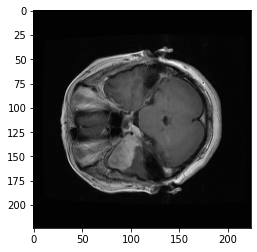

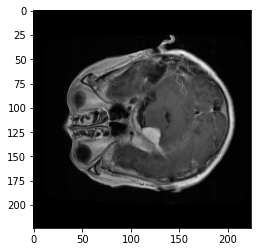

Epoch 1/100
2522/2522 [==============================] - 8s 3ms/step - loss: 1.0183 - accuracy: 0.4703
Epoch 2/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.8876 - accuracy: 0.6277
Epoch 3/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.8084 - accuracy: 0.7082
Epoch 4/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.7530 - accuracy: 0.7169
Epoch 5/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.7046 - accuracy: 0.7518
Epoch 6/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.6687 - accuracy: 0.7601
Epoch 7/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.6403 - accuracy: 0.7688
Epoch 8/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.6197 - accuracy: 0.7661
Epoch 9/100
2522/2522 [==============================] - 8s 3ms/step - loss: 0.6013 - accuracy: 0.7708
Epoch 10/100
2522/2522 [==============================] - 8s 3ms/step - l

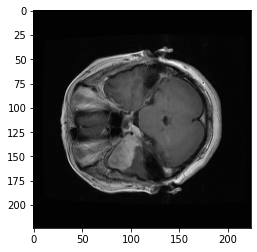

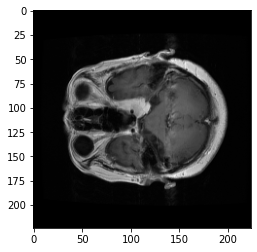

Epoch 1/100
2385/2385 [==============================] - 8s 3ms/step - loss: 1.0250 - accuracy: 0.5069
Epoch 2/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.8953 - accuracy: 0.6344
Epoch 3/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.8176 - accuracy: 0.6922
Epoch 4/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.7574 - accuracy: 0.7249
Epoch 5/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.7123 - accuracy: 0.7501
Epoch 6/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.6764 - accuracy: 0.7681
Epoch 7/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.6466 - accuracy: 0.7744
Epoch 8/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.6201 - accuracy: 0.7878
Epoch 9/100
2385/2385 [==============================] - 7s 3ms/step - loss: 0.6019 - accuracy: 0.8000
Epoch 10/100
2385/2385 [==============================] - 7s 3ms/step - l

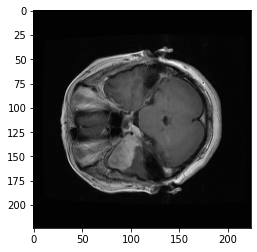

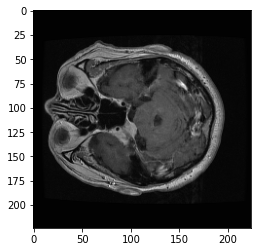

Epoch 1/100
2492/2492 [==============================] - 8s 3ms/step - loss: 1.0701 - accuracy: 0.4683
Epoch 2/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.9303 - accuracy: 0.5734
Epoch 3/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.8376 - accuracy: 0.6717
Epoch 4/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.7758 - accuracy: 0.7030
Epoch 5/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.7289 - accuracy: 0.7279
Epoch 6/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.6923 - accuracy: 0.7464
Epoch 7/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.6601 - accuracy: 0.7640
Epoch 8/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.6375 - accuracy: 0.7632
Epoch 9/100
2492/2492 [==============================] - 8s 3ms/step - loss: 0.6187 - accuracy: 0.7781
Epoch 10/100
2492/2492 [==============================] - 8s 3ms/step - l

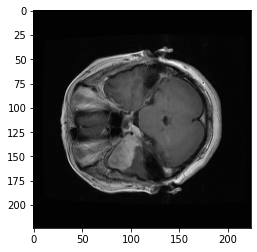

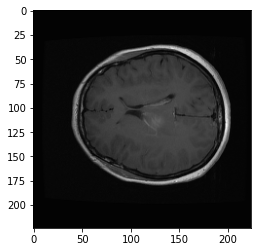

Epoch 1/100
2436/2436 [==============================] - 8s 3ms/step - loss: 1.0018 - accuracy: 0.5238
Epoch 2/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.8862 - accuracy: 0.6404
Epoch 3/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.8099 - accuracy: 0.6958
Epoch 4/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.7607 - accuracy: 0.7229
Epoch 5/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.7196 - accuracy: 0.7319
Epoch 6/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.6857 - accuracy: 0.7434
Epoch 7/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.6601 - accuracy: 0.7599
Epoch 8/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.6392 - accuracy: 0.7660
Epoch 9/100
2436/2436 [==============================] - 8s 3ms/step - loss: 0.6185 - accuracy: 0.7796
Epoch 10/100
2436/2436 [==============================] - 8s 3ms/step - l

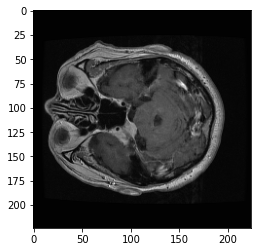

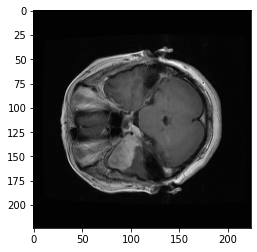

Epoch 1/100
2421/2421 [==============================] - 8s 3ms/step - loss: 1.0474 - accuracy: 0.4672
Epoch 2/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.8992 - accuracy: 0.6204
Epoch 3/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.8184 - accuracy: 0.6584
Epoch 4/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.7506 - accuracy: 0.7257
Epoch 5/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.7031 - accuracy: 0.7443
Epoch 6/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.6665 - accuracy: 0.7551
Epoch 7/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.6347 - accuracy: 0.7765
Epoch 8/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.6099 - accuracy: 0.7811
Epoch 9/100
2421/2421 [==============================] - 8s 3ms/step - loss: 0.5907 - accuracy: 0.7910
Epoch 10/100
2421/2421 [==============================] - 8s 3ms/step - l

In [18]:
import time
preds=[]
final_result=[]
answers=[]
history=[]
times=[]
for index in range(1,6):
  K.clear_session()
  ep=100
  gc.collect()
  trn,tst=get_trn_tst(df,index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  del([trn,tst])
  gc.collect()
    
    
    
  def cng(idx):
    return 1e-4*(0.1**1)**(idx/ep)
  mod=VGG16(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)
  lrs=LearningRateScheduler(cng)
  esr=EarlyStopping(patience=10,min_delta=0.1,restore_best_weights=True,monitor='val_loss')
  for i in range(len(model.layers)):
    model.layers[i].trainable = False
  model.layers[-1].trainable=True
  model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
    
  
  start=time.time()
  hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=ep,callbacks=[lrs])
  end=time.time()
  times.append(end-start)

  history.append(hist.history)
  pre=model.predict(tst_x)
  preds.append(pre)
  answers.append(tst_y)
  del([trn_x,tst_x,model])
  gc.collect()
  final_result.append(accuracy_score(tst_y,np.argmax(pre,1)))
  gc.collect()

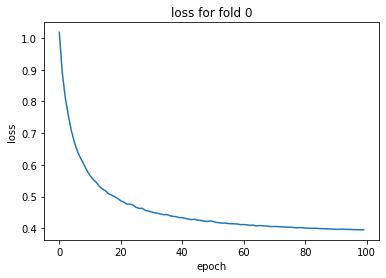

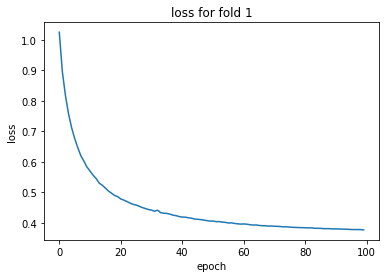

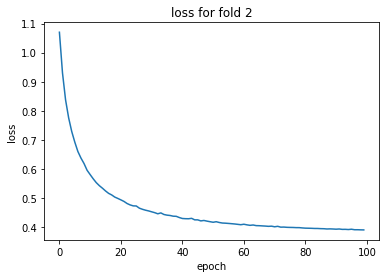

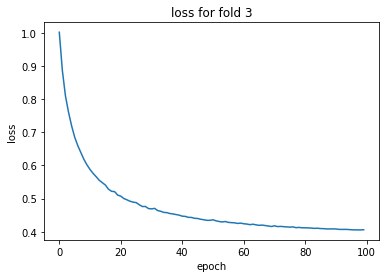

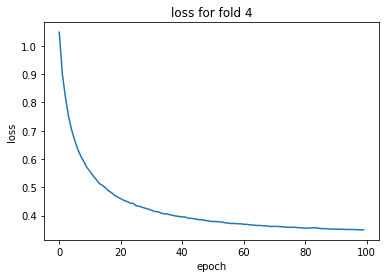

In [19]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

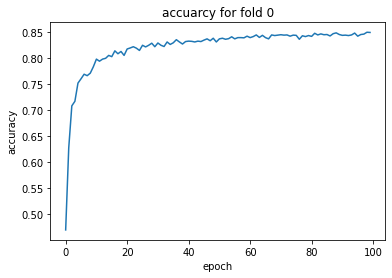

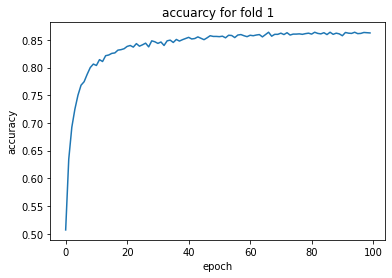

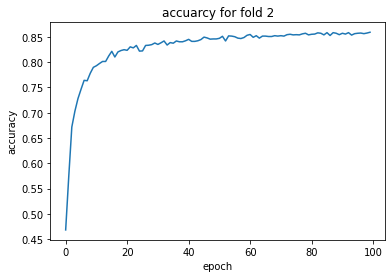

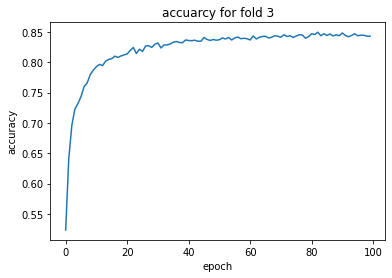

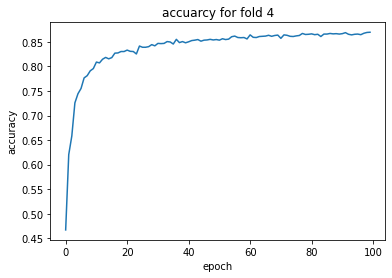

In [20]:
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('accuarcy for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

In [21]:
np.mean(final_result)

0.8387878817892173

In [22]:
from sklearn.metrics import confusion_matrix
for i in range(len(preds)):
    pre=np.argmax(preds[i],1)
    print(confusion_matrix(answers[i],pre))
    print()

[[ 95  15   2]
 [ 21 219   5]
 [ 14  14 157]]

[[ 87  56  24]
 [ 39 285  14]
 [  3   6 165]]

[[108  26   5]
 [ 43 184   4]
 [  0  10 192]]

[[ 92  18  14]
 [ 27 293   5]
 [  5   1 173]]

[[ 90  49  27]
 [ 38 247   2]
 [  7   6 177]]



In [25]:
mod=VGG16(include_top=True, weights='imagenet')
out_1=mod.layers[-2].output
out=Dense(3,activation='softmax')(out_1)
model=Model(inputs=mod.input,outputs=out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
np.mean(times)

759.3368272304535